# Aprendizaje supervisado vs no supervisado

In [1]:
# 1. Regresion lineal

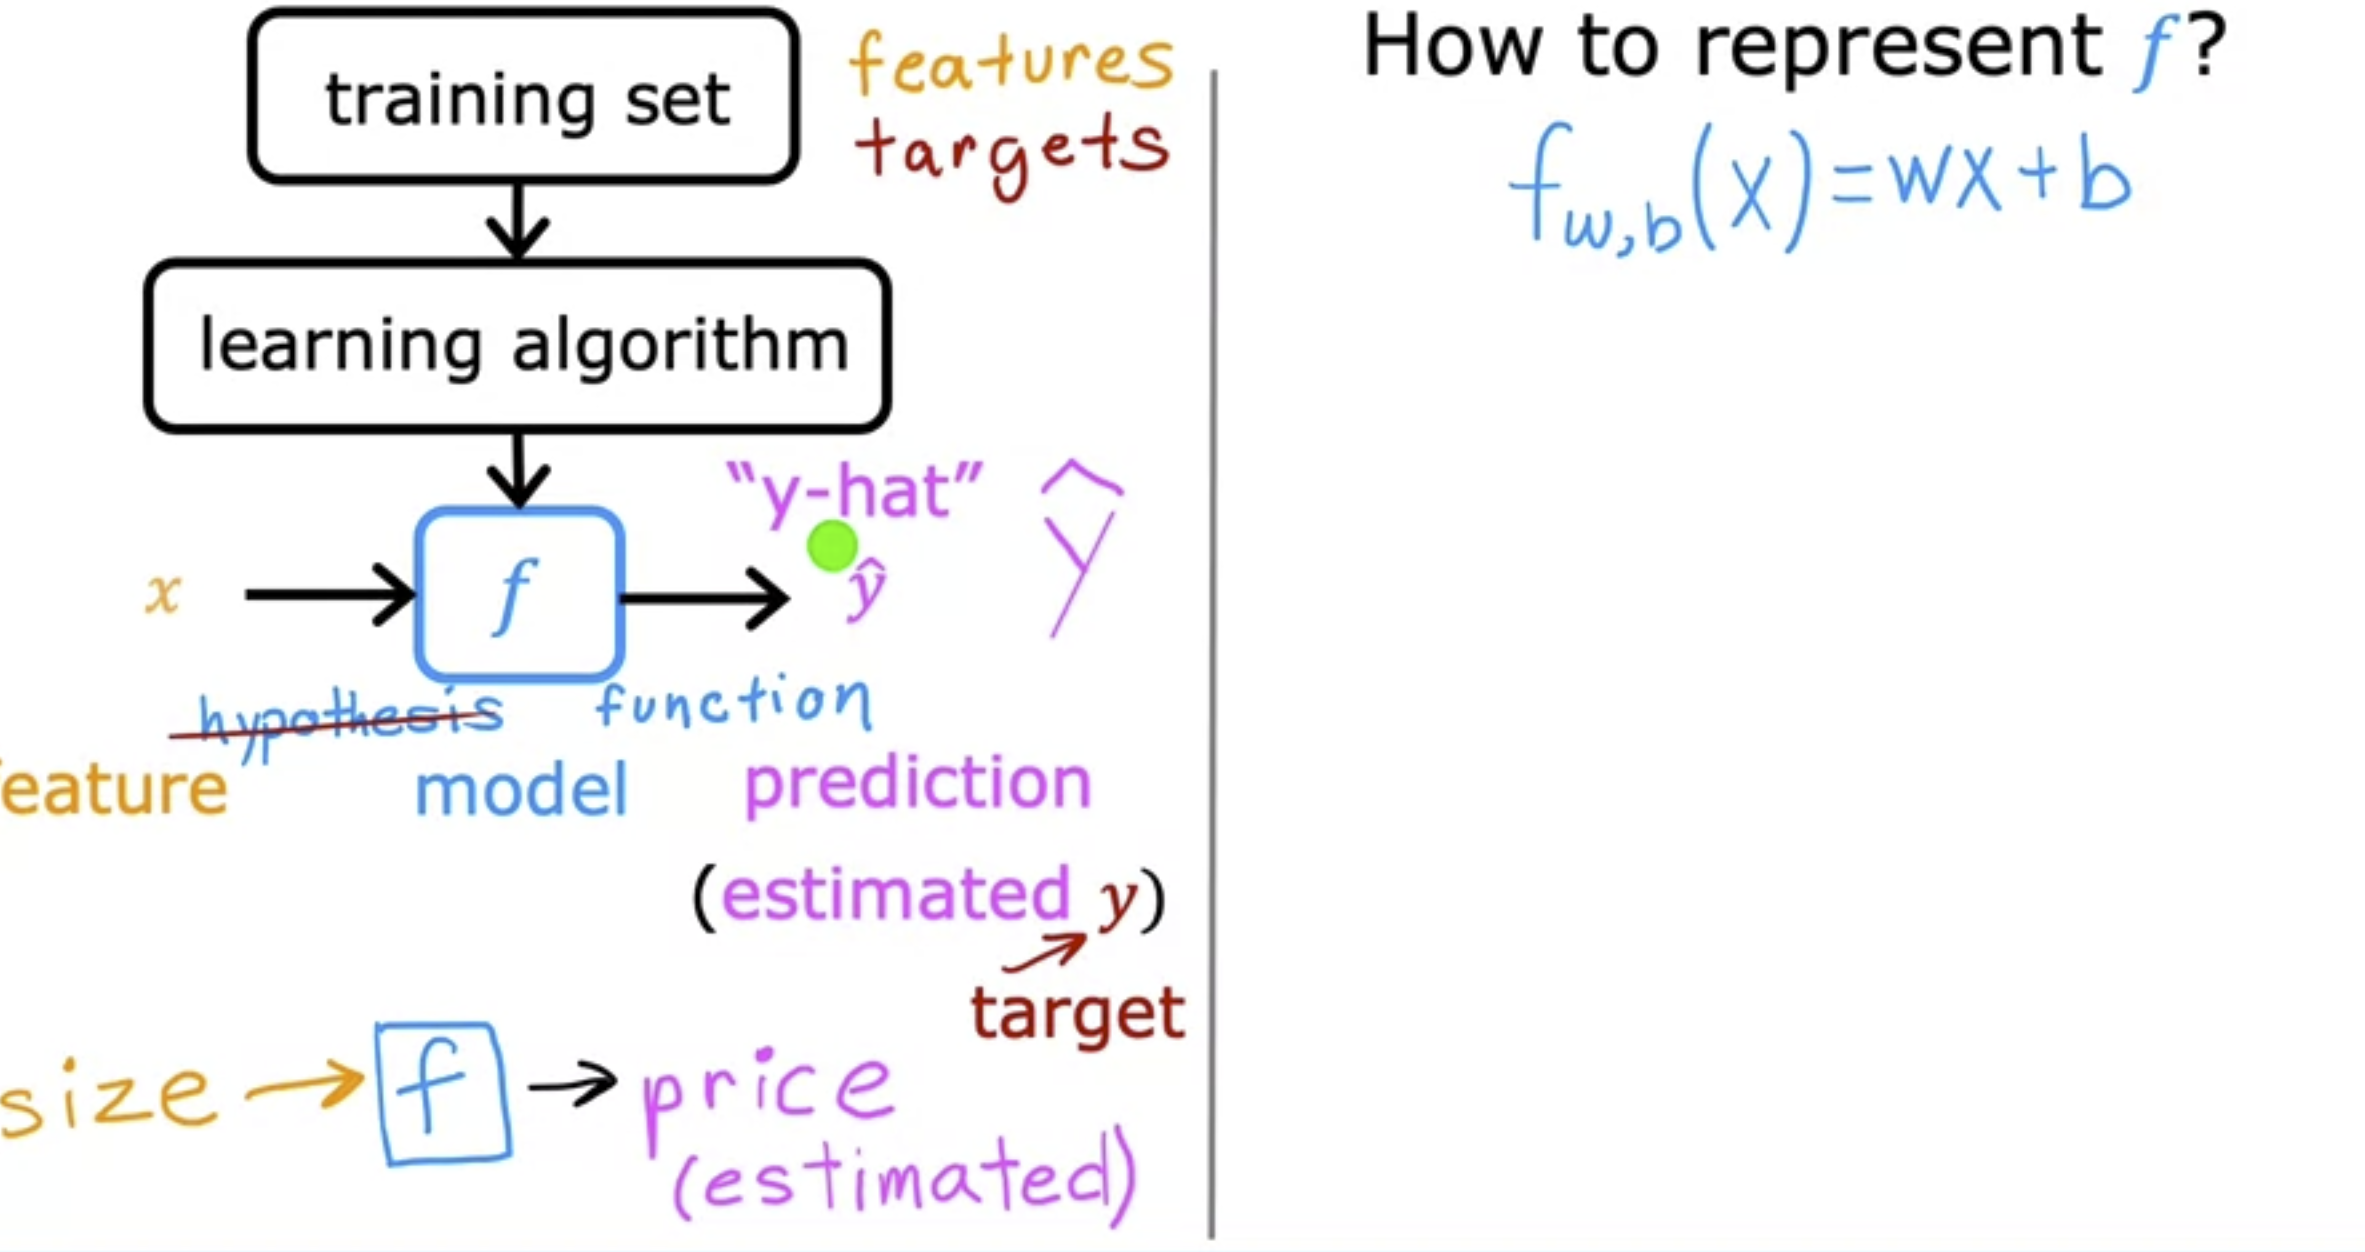

In [2]:
# A esto lo llamamos "regresion lineal con una variable" o univariado (solo un x)

## Ejercicio 1

<img src="https://raw.githubusercontent.com/greyhatguy007/Machine-Learning-Specialization-Coursera/1a6b6fc2851e6ab2d44f86b84db316a82a70e494/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week1/Optional%20Labs/images/C1_W1_L3_S1_trainingdata.png">


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
X_train = np.array([1.,2.,3,4.])
y_train = np.array([300,500,700,900])

print(f"X_train = {X_train}")
print(f"y_train = {y_train}")

X_train = [1. 2. 3. 4.]
y_train = [300 500 700 900]


In [5]:
#Usaremos "m" para el denotar el numero de ejemploes de entrenamiento, usamos la .shape para retorna como tupla la dimension del dataframe
print(f"train shape : {X_train.shape}")
m = X_train.shape[0]
print(f"Numero de datos de entrenamiento es : {m}") # Tambien podriamos usar len(X_train) -> 4

train shape : (4,)
Numero de datos de entrenamiento es : 4


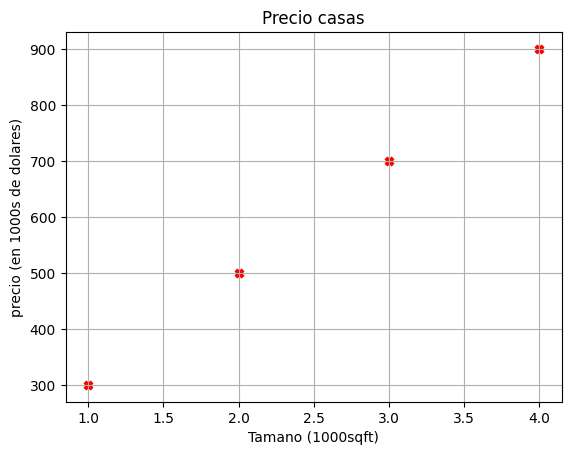

In [6]:
#graficando la data
plt.scatter(x=X_train,y=y_train,marker='X',c='r')
plt.title("Precio casas")
plt.ylabel("precio (en 1000s de dolares)")
plt.xlabel("Tamano (1000sqft)")
plt.grid()
plt.show()

In [7]:
#Generar modelo f(x) = wx + b 
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


for x(0) f_wb = w * x[0] + b <br>
for x(1) f_wb = w * x[1] + b

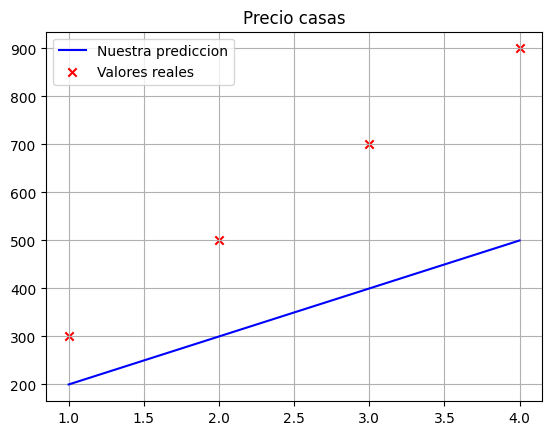

In [8]:
def compute_model_output(x, w, b):
    """
        Args : 
        X (ndarray(m,)): data, m examples
        w,b (scalar) : parametros del modelo

        Return
        y (ndarray (m,)) target
    """

    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

tmp_f_wb = compute_model_output(X_train,w,b)

#plot
plt.plot(X_train,tmp_f_wb,c='b',label='Nuestra prediccion')
plt.scatter(X_train,y_train,marker='x',c='r',label='Valores reales')
plt.title("Precio casas")
plt.legend()
plt.grid()
plt.show()

comentarios : revisando w = 100 y b = 100 no resulta ajustarse lo suficiente a nuestros datos <br>
quizas cambiando los valores se podria ajustar de mejor manera<br<
<br>

Intentemos con w=200 y b = 100

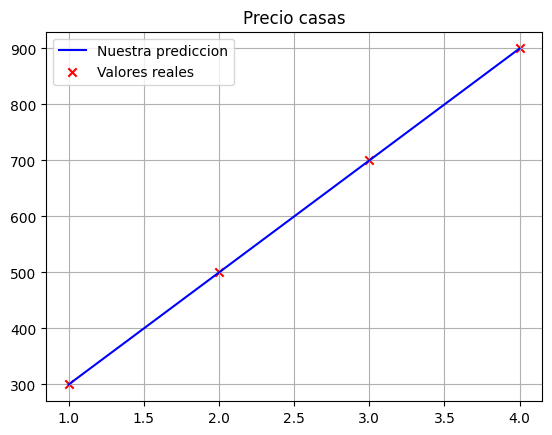

In [9]:
tmp_f_wb = compute_model_output(X_train,w=200,b=100)

#plot
plt.plot(X_train,tmp_f_wb,c='b',label='Nuestra prediccion')
plt.scatter(X_train,y_train,marker='x',c='r',label='Valores reales')
plt.title("Precio casas")
plt.legend()
plt.grid()
plt.show()

comentarios: Ahora si!! vemos como actualizando uno de los valores, la linea de prediccion logra ajustarse! 

## Funcion de coste

El termino 'costo' en esta tarea puede resultar algo confuso ya que los datos son el costo de la vivienda. Aqui el costo es una medida de que tan bien nuestro modelo predice el precio objetivo de la casa.

- F w,b(x) = wx + b -> es nuestra prediccion
- (f w,b(Xi) - Yi)**2 -> es la diferencia cuadradta entre el target y el valor de la prediccion


formula =  1 / 2*m sum(f_wb(Xi) - Yi) ** 2 

<img src='https://raw.githubusercontent.com/greyhatguy007/Machine-Learning-Specialization-Coursera/1a6b6fc2851e6ab2d44f86b84db316a82a70e494/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week1/Optional%20Labs/images/C1_W1_Lab02_GoalOfRegression.PNG'>

In [10]:
# Nuestra meta es encontrar el modelo F w,b (x) = wx + b, con parametros w,b, cuales seran predicciones correctas a partir de una entrada X, 
#El costo es la medicion de que tran preciso es el modelo con la data de entrenamiento 

In [32]:
def compute_cost(x, y, w=200, b=100):
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2 
        cost_sum += cost 
    total_cost = (1/(2 * m)) * cost_sum
    return total_cost

In [33]:
#revision de resultados 
cost = compute_cost(X_train, y_train)

In [34]:
print(f"cost : {cost}")

cost : 0.0


## Descenso del gradiente 

Algoritmo de optimizacion iterativo de primer orden que permite encontrar minimo locales en una funcion diferenciable.

In [35]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0 

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m 
    
    return dj_db,dj_dw

<img src="https://raw.githubusercontent.com/greyhatguy007/Machine-Learning-Specialization-Coursera/1a6b6fc2851e6ab2d44f86b84db316a82a70e494/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week1/Optional%20Labs/images/C1_W1_Lab03_lecture_slopes.PNG">

In [51]:
def gradient_descent(x , y, w_in, b_in, alpha, n_iters, cost_funcion, compute_gradient):
    import math, copy
    """
    args : 
        x (ndarray(m,)) : data, m examples
        y (ndarray(m,)) : target values
        w_in,b_in (scalar) : initial values of model parameters 
        alpha (float) :  learning rate
        num_iters (int) : number of iterations to run gradint descent
        cost_funcition : function to call to produce cost 
        gradint_function : funtion to call to product gradient

    returns:
    w (scalar) : updated value of parameter after running gradint descent 
    b (scalar) : updated value of parameter after running gradint descent
    J_history (list) : History of cost values
    p_history (list) : History of parameters (w,b)
    """
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(n_iters):
        # calular el gradiente y actualizar los parametris usando la funcion "gradient_descent"
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Actualizar parametros usando la equacion 3 
        b = b - alpha * dj_db
        w = w - alpha * dj_db

        # Guardar el cost J de cada iteracion 
        if i < 100000:
            J_history.append(cost_funcion(x, y, w, b))
            p_history.append([w,b])
        #Imprimir el cost de cada itreracion con intervalos de 10 tiempos 
        if i % math.ceil(n_iters/10) == 0:
            print(f"Iteracon {i}, costo : {J_history[-1]:0.2e}")
            print(f"dj_dw : {dj_dw:0.3e}, dj_db : {dj_db:0.3e}")
            print(f"w : {w:0.3e}, b :{b:0.3e}")
    return w, b, J_history, p_history

In [54]:
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist= gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteracon 0, costo : 1.66e+05
dj_dw : -6.000e+02, dj_db : -1.750e+03
w : 1.750e+01, b :1.750e+01
Iteracon 1000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 2000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 3000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 4000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 5000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 6000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 7000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 8000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02
Iteracon 9000, costo : 4.69e+02
dj_dw : 1.250e+01, dj_db : -1.407e-12
w : 1.750e+02, b :1.750e+02


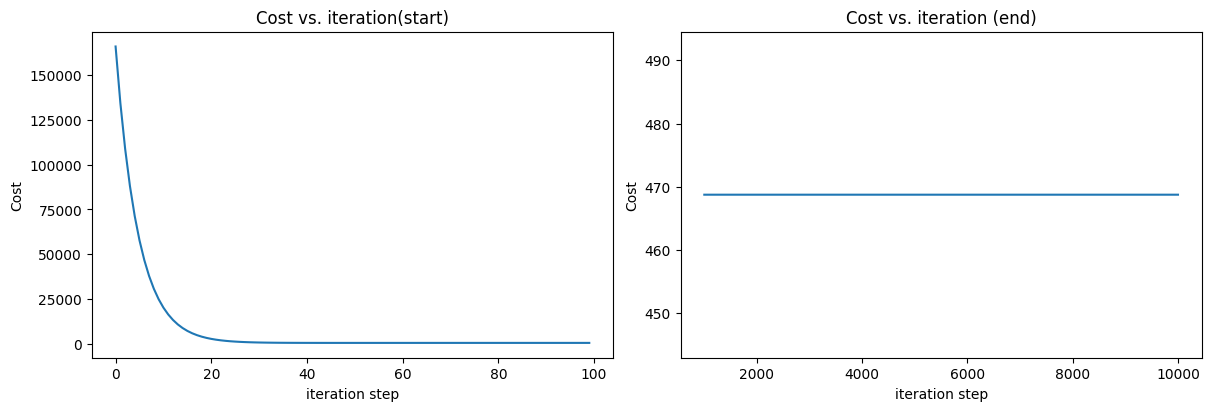

In [55]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()